# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [9]:
airbnb = pd.read_csv('/workspace/undergrad_ml/data/airbnb_NYC.csv', encoding="cp1252")
airbnb.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [10]:
airbnb["Price_raw"] = airbnb["Price"]

price_str = airbnb["Price"].astype(str).str.strip()

price_str = price_str.str.replace("$", "", regex=False)
price_str = price_str.str.replace(",", "", regex=False)

airbnb["Price"] = pd.to_numeric(price_str, errors="coerce")

airbnb.loc[airbnb["Price"] <= 0, "Price"] = np.nan

missing_price = airbnb["Price"].isna().sum()
missing_price


np.int64(0)

1. The 'Price' variable was originally stored as text rather than numeric because it included formatting inclusing symbols like ',' for thousands and '$'(numbers over 999 would appear like so: 1,234). I cleaned the variable by stripping whitespace, removing dollar signs and commas, and then converting the result to numeric using pd.to_numeric(..., errors="coerce"). Any values that could not be interpreted as valid numbers were converted to missing (NaN). I then removed all NaN values so that there were none. FInally, I also set any non-positive prices (≤ 0) to missing because they are not realistic Airbnb prices.

In [14]:
mn = pd.read_csv('/workspace/undergrad_ml/data/mn_police_use_of_force.csv', encoding="cp1252")
mn.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [15]:
mn["subject_injury_clean"] = mn["subject_injury"].astype(str).str.strip().str.title()

valid = ["Yes", "No"]
mn.loc[~mn["subject_injury_clean"].isin(valid), "subject_injury_clean"] = np.nan

prop_missing = mn["subject_injury_clean"].isna().mean()
print("Proportion missing:", prop_missing)

cross_tab = pd.crosstab(mn["subject_injury_clean"], mn["force_type"])
print(cross_tab)

mn["subject_injury_clean"] = mn["subject_injury_clean"].fillna("Missing")

Proportion missing: 0.7619342359767892
force_type            Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury_clean                                                    
No                        0          1093                131        2   
Yes                       2          1286                 41        0   

force_type            Gun Point Display  Improvised Weapon  \
subject_injury_clean                                         
No                                   33                 34   
Yes                                  44                 40   

force_type            Less Lethal Projectile  Police K9 Bite  Taser  
subject_injury_clean                                                 
No                                         1               2    150  
Yes                                        2              44    172  


2. I cleaned the 'subject_injury' variable by standardizing the text and restricting values to exactly “Yes” or “No”. Anything else (blanks and invalid entries) was treated as missing. Before replacing missing values, I calculated the proportion of missing entries to quantify how common missing injury data is. I then cross-tabulated the cleaned 'subject_injury' against the 'force_type' variable to see if missingness was related to specific force types. Finally, I replaced the remaining missing entries with "Missing" to ensure the variable contains no null values. After cleaning 'subject_injury', 76.19% of the values were missing (proportion missing = 0.7619342359767892). In the non-missing cases, injuries (“Yes”) were especially common for Bodily Force (1286 Yes vs 1093 No) and Taser incidents (172 Yes vs 150 No), while Chemical Irritant cases were more often recorded as No injury (131 No vs 41 Yes). This suggests that injury reporting is much more complete for a few common force types, while most of the dataset lacks injury information overall.

In [16]:
metabric = pd.read_csv('/workspace/undergrad_ml/data/metabric.csv', encoding="cp1252")
metabric.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


In [18]:
metabric["Overall Survival Status_binary"] = (
    metabric["Overall Survival Status"]
    .astype(str)
    .str.strip()
    .str.upper()
    .str.split(":", expand=True)[1]
    .map({"DECEASED": 0, "LIVING": 1})
)

metabric[["Overall Survival Status", "Overall Survival Status_binary"]].head()

,Overall Survival Status,Overall Survival Status_binary
0,0:LIVING,1
1,1:DECEASED,0
2,0:LIVING,1
3,1:DECEASED,0
4,1:DECEASED,0


3. I converted the 'Overall Survival Status' into a binary variable.

In [19]:
missing_reviews = airbnb["Review Scores Rating"].isna().sum()
missing_reviews


np.int64(8323)

In [20]:
median_review = airbnb["Review Scores Rating"].median()

airbnb["Review Scores Rating_imputed"] = airbnb["Review Scores Rating"].fillna(median_review)

median_review

np.float64(94.0)

In [21]:
airbnb["Review Scores Rating_imputed"].isna().sum()

np.int64(0)

4. Median imputation can bias results because it artificially reduces the variability of the review score variable by replacing many different missing values with the same constant. It also assumes that listings with missing review scores are 'typical', even though missingness is likely not random. This can weaken relationships between review score and other variables and may lead to misleading model results or underestimated uncertainty.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [36]:
sharks = pd.read_excel('/workspace/undergrad_ml/data/GSAF5.xls')
sharks.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. Since this is a excel file, we must use 'pd.read_excel' to load in the dataset. We also had to install something from pip.

In [39]:
sharks = sharks.dropna(axis=1, how="all")

2. Dropped columns without data.

3. In this dataset, an observation is one shark-attack incident (one row)—i.e., a single reported event with details like date, location, victim info, whether it was fatal, and whether it was provoked/unprovoked.

In [40]:
sharks["Year"] = sharks["Year"].astype(str)

sharks["Year_clean"] = sharks["Year"].str.extract(r"(\d{4})")

sharks["Year_clean"] = pd.to_numeric(sharks["Year_clean"], errors="coerce")

sharks[["Year", "Year_clean"]].head(10)

,Year,Year_clean
0,2026.0,2026.0
1,2026.0,2026.0
2,2026.0,2026.0
3,2026.0,2026.0
4,2026.0,2026.0
5,2026.0,2026.0
6,2026.0,2026.0
7,2026.0,2026.0
8,2026.0,2026.0
9,2026.0,2026.0


In [41]:
sharks["Year_clean"].describe()

count    6941.000000
mean     1972.531336
std        51.059408
min      1000.000000
25%      1951.000000
50%      1988.000000
75%      2010.000000
max      2026.000000
Name: Year_clean, dtype: float64

In [42]:
sharks_1940 = sharks[sharks["Year_clean"] >= 1940].copy()

In [43]:
attacks_per_year = (
    sharks_1940.groupby("Year_clean")
    .size()
    .reset_index(name="n_attacks")
    .sort_values("Year_clean")
)

attacks_per_year.head()

,Year_clean,n_attacks
0,1940.0,24
1,1941.0,27
2,1942.0,41
3,1943.0,28
4,1944.0,31


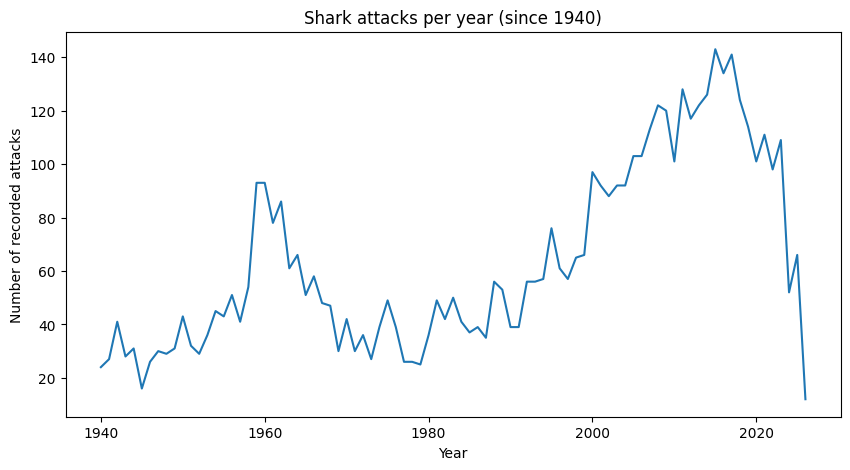

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(attacks_per_year["Year_clean"], attacks_per_year["n_attacks"])
plt.xlabel("Year")
plt.ylabel("Number of recorded attacks")
plt.title("Shark attacks per year (since 1940)")
plt.show()

4. After cleaning the Year variable by extracting 4-digit years and converting to numeric values, the years range from approximately 1000 to 2026. Filtering to attacks since 1940 shows that recorded shark attacks increase over time, especially after the late 20th century. However, this likely reflects improved reporting and increased human exposure to ocean activities rather than a purely biological increase in shark aggression.

In [47]:
sharks["Age"] = sharks["Age"].astype(str).str.strip()

sharks["Age_clean"] = sharks["Age"].str.extract(r"(\d+)")

sharks["Age_clean"] = pd.to_numeric(sharks["Age_clean"], errors="coerce")

sharks.loc[(sharks["Age_clean"] < 0) | (sharks["Age_clean"] > 100), "Age_clean"] = np.nan

sharks[["Age", "Age_clean"]].head(15)

,Age,Age_clean
0,13,13.0
1,?,NaN
2,?,NaN
3,39,39.0
4,11,11.0
5,27,27.0
6,12,12.0
7,26,26.0
8,?,NaN
9,56,56.0


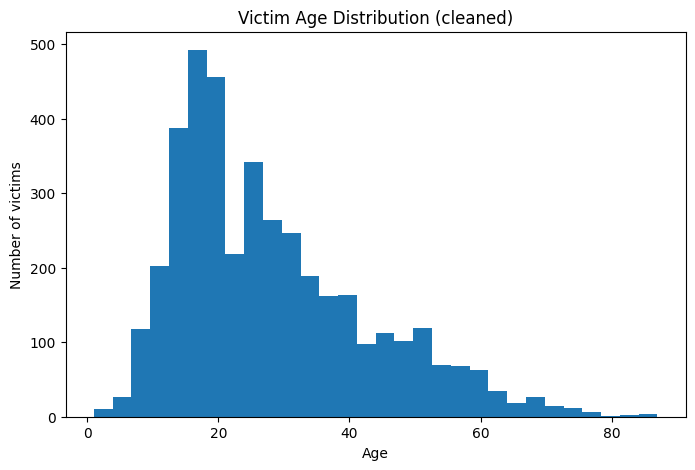

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(sharks["Age_clean"].dropna(), bins=30)
plt.xlabel("Age")
plt.ylabel("Number of victims")
plt.title("Victim Age Distribution (cleaned)")
plt.show()

In [49]:
sharks["Age"].value_counts().head(20)

Age
nan    2994
17      174
18      160
15      157
20      156
16      152
19      152
21      130
22      126
25      120
14      119
24      117
13      108
26      103
23       90
29       88
30       88
12       88
28       87
27       86
Name: count, dtype: int64

5. I cleaned and plotted the 'Age' variable into a histogram.

In [50]:
sharks["Type_clean"] = sharks["Type"].astype(str).str.strip().str.lower()

sharks["Type_clean"] = sharks["Type_clean"].replace({
    "provoked": "Provoked",
    "unprovoked": "Unprovoked"
})

sharks.loc[~sharks["Type_clean"].isin(["Provoked", "Unprovoked"]), "Type_clean"] = "Unknown"

sharks["Type_clean"].value_counts(dropna=False)

Type_clean
Unprovoked    5226
Unknown       1204
Provoked       644
Name: count, dtype: int64

In [56]:
known = sharks[sharks["Type_clean"].isin(["Provoked", "Unprovoked"])]

prop_unprovoked_known = (known["Type_clean"] == "Unprovoked").mean()
prop_unprovoked_known

np.float64(0.8902896081771721)

In [57]:
prop_unprovoked_all = (sharks["Type_clean"] == "Unprovoked").mean()
prop_unprovoked_all

np.float64(0.7387616624257846)

In [58]:
print(f"Proportion unprovoked (all rows): {prop_unprovoked_all:.3f}")
print(f"Proportion unprovoked (known only): {prop_unprovoked_known:.3f}")

Proportion unprovoked (all rows): 0.739
Proportion unprovoked (known only): 0.890


6. After cleaning the Type variable into Provoked, Unprovoked, and Unknown, the proportion of attacks that are unprovoked is 89% (among incidents where Type is known). Unknown values include questionable, invalid, or missing records.

In [59]:
sharks["Fatal_clean"] = sharks["Fatal Y/N"].astype(str).str.strip().str.upper()

sharks["Fatal_clean"] = sharks["Fatal_clean"].replace({
    "Y": "Y",
    "N": "N"
})

sharks.loc[~sharks["Fatal_clean"].isin(["Y", "N"]), "Fatal_clean"] = "Unknown"

sharks["Fatal_clean"].value_counts()

Fatal_clean
N          4942
Y          1489
Unknown     643
Name: count, dtype: int64

7. I cleaned the 'Fatal Y/N' variable by converting it to uppercase, trimming whitespace, and mapping valid values to 'Y' or 'N'. Any missing or nonstandard entries were grouped into a third category, 'Unknown'.

In [60]:
sub = sharks[
    (sharks["Type_clean"].isin(["Provoked", "Unprovoked"])) &
    (sharks["Fatal_clean"].isin(["Y", "N"]))
].copy()

In [61]:
fatal_rates = (
    sub.groupby("Type_clean")["Fatal_clean"]
    .apply(lambda x: (x == "Y").mean())
)

fatal_rates

Type_clean
Provoked      0.033071
Unprovoked    0.246357
Name: Fatal_clean, dtype: float64

In [62]:
summary = (
    sub.groupby("Type_clean")["Fatal_clean"]
    .value_counts(normalize=True)
    .unstack()
)

summary


Fatal_clean,N,Y
Type_clean,,
Provoked,0.966929,0.033071
Unprovoked,0.753643,0.246357


8. After filtering to incidents with known Type (Provoked or Unprovoked) and known fatal outcome (Y or N), unprovoked attacks have a higher fatality rate than provoked attacks. This is likely because provoked attacks often involve defensive or warning bites during human–shark interaction, while unprovoked attacks may involve more severe injuries and occur farther from immediate help. However, the result may also be influenced by reporting and classification bias.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

1. This paper is about data tidying, a kep aspect in data cleaning. Wickham argues that tidy datasets follow a consistent structure where each variable is a column, each observation is a row, and each observational unit is a table. This makes data easier to manipulate, model, and visualize.
2. The tidy data standard is meant to: 
    - make intial data cleaning easier
    - support exploration and analysis
    - help tools "work together" without constant reformatting
    Wickham specifically says it prevents needing to "reinvent the wheel" each time and reduces the tedious step of "munging the output from one tool so you can input into another."
3. Quote 1: "Like families, tidy databases are all alike but every messy datasetis messy in its own way."
    This means that tidy data has a consistent predictable structure, but messy data can be disorganized and raise issues in many unique ways. So tidy data is easier to work with because you can recognize it quickly, while messy data is unpredictable and requires custom fixes. 
   Quote 2: "For a given dataset, it's usually easy to figure out what are observations and what are variables, but it is suprisingly difficult to precisely define variables and observations in general."
    This means that in a specific dataset, we can usually decide what "one row represents", but in general, those concepts get messy because the same table can be interpreted multiple ways depending on the context and analysis goal. 
4. Wickman defines
    - Values as the actual data entries (numbers or strings)
    - Variables as a set of values measuring the same attribute across units 
    - Observations as all values measured on the same unit across attributes
    And he emphasizes: 
    every value belongs to a variuable and an observation.
5. A dataset is tidy if: 
    1. Each variable forms a column
    2. Each observation forms a row
    3. Each type of observational unit forms a table
    Wickham says messy data is basically 'anything that violates these rules.'
6. The 5 most common messy dataset problems: 
    - Columns headers are values, not variable names
    - Multiple variables are stored in one column 
    - Variables are stored in both rows and columns
    - Multiple types of observational units are stored in the same table 
    - A single observational unit is stored in multiple tables
    Table 4 is messy because the income groups are stored as column headers, but income is actually a variable. In tidy form, income would be a column, not a set of column names.
    Melting means turning columns into rows. Specifically, Wickham says it creates:
    - a new variable called 'column' (which contains the old column headings)
    - a new variabled called 'value' (which contains the stacked values)
    This turns a wide "presentation table" into a long tidy table.
7. Table 11 is messy because: 
    - some variables are stored in columns (id, year, month)
    - some variables are stored across many columns (d1-d31)
    - and the variable names 'tmin' and 'tmax' are stored in rows, not columns
    So variables are scattered in both row and column directions, and the element column is not a real variable, instead it stores variable names.
    Table 12(a) is 'molten' becuase after melting, it becomes a long format with: 
    - 'id', 'date', 'element', 'value' 
    It's almost tidy, but still has variable names stored as values in the 'element' column.
    Table 12(b) is fully tidy because the cast/unstack step turns 'element' back into real variables, producing: 
    - 'id', 'date', 'tmax', 'tmin' 
    So each variable is now a column and each row is one day. 

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

In [64]:
gifts = pd.read_csv('/workspace/undergrad_ml/data/ForeignGifts_edu.csv')
gifts.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


In [65]:
gifts["Foreign Gift Amount"] = (
    gifts["Foreign Gift Amount"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .str.replace("$", "", regex=False)
)

gifts["Foreign Gift Amount"] = pd.to_numeric(gifts["Foreign Gift Amount"], errors="coerce")

In [66]:
gifts["Foreign Gift Amount"].describe()

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64

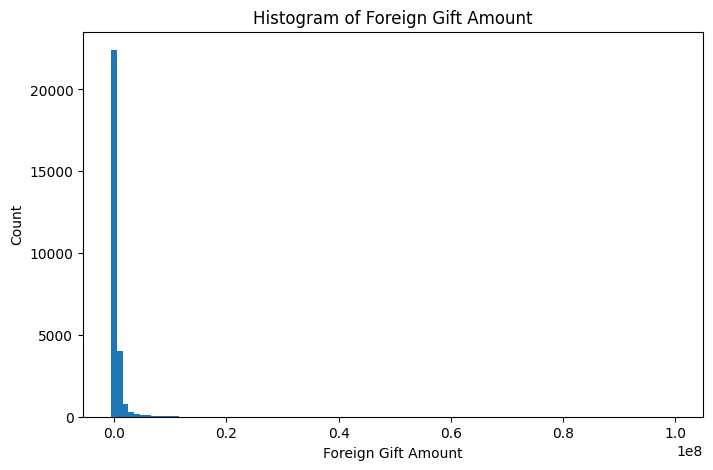

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(gifts["Foreign Gift Amount"].dropna(), bins=100)
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Count")
plt.title("Histogram of Foreign Gift Amount")
plt.show()

2. We observe an extreme right skew and unimodal distribution.

In [73]:
gift_counts = gifts["Gift Type"].value_counts(dropna=False)
gift_props = gifts["Gift Type"].value_counts(normalize=True)

gift_counts, gift_props

(Gift Type
 Contract         17274
 Monetary Gift    10936
 Real Estate         11
 Name: count, dtype: int64,
 Gift Type
 Contract         0.612097
 Monetary Gift    0.387513
 Real Estate      0.000390
 Name: proportion, dtype: float64)

3. I created a value counts table.

In [75]:
top15_country_count = (
    gifts.groupby("Country of Giftor")["Foreign Gift Amount"]
    .count()
    .sort_values(ascending=False)
    .head(15)
)

top15_country_count

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: Foreign Gift Amount, dtype: int64

In [76]:
top15_country_amount = (
    gifts.groupby("Country of Giftor")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

top15_country_amount


Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64

4. Displayed Top 15 Countries and total amount.

In [77]:
top15_inst_amount = (
    gifts.groupby("Institution Name")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

top15_inst_amount

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64

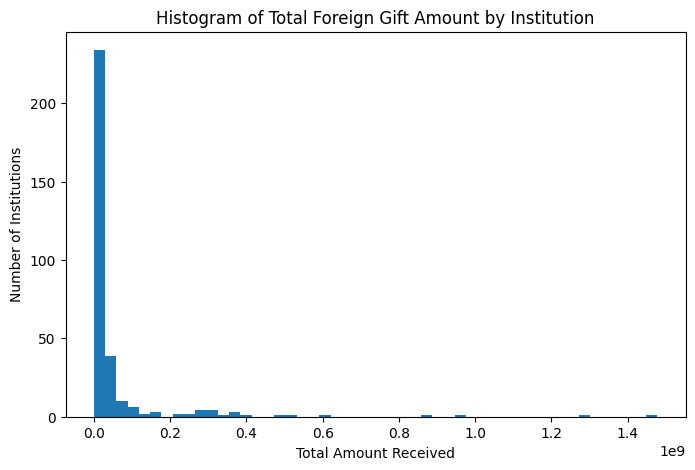

In [79]:
inst_totals = gifts.groupby("Institution Name")["Foreign Gift Amount"].sum()

plt.figure(figsize=(8,5))
plt.hist(inst_totals.dropna(), bins=50)
plt.xlabel("Total Amount Received")
plt.ylabel("Number of Institutions")
plt.title("Histogram of Total Foreign Gift Amount by Institution")
plt.show()

5. Displayed Top 15 institutions and made a histogram.

In [80]:
top_giftors = (
    gifts.groupby("Giftor Name")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

top_giftors

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64

6. Displayed which giftors provided the most money (total).

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [ ]:
college = pd.read_csv('/workspace/undergrad_ml/data/college_completion.csv')
college.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [83]:
college.shape

(3798, 63)

2. There are 63 variables and 3798 observations.

In [84]:
pd.crosstab(college["control"], college["level"])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


3. Publiuc schools are heavily represented in 2-year programs. Private not-for-profit are very largely 4-year programs. 

In [85]:
college["grad_100_value"] = pd.to_numeric(college["grad_100_value"], errors="coerce")
college["aid_value"] = pd.to_numeric(college["aid_value"], errors="coerce")

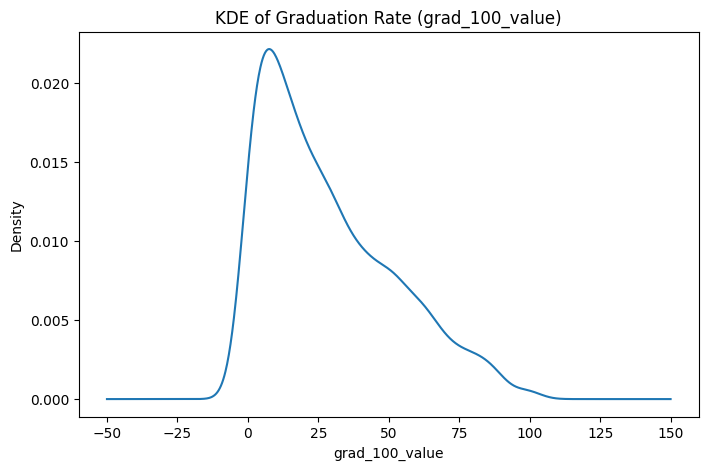

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

In [86]:
import matplotlib.pyplot as plt

college["grad_100_value"].plot(kind="kde", figsize=(8,5))
plt.xlabel("grad_100_value")
plt.title("KDE of Graduation Rate (grad_100_value)")
plt.show()

college["grad_100_value"].describe()

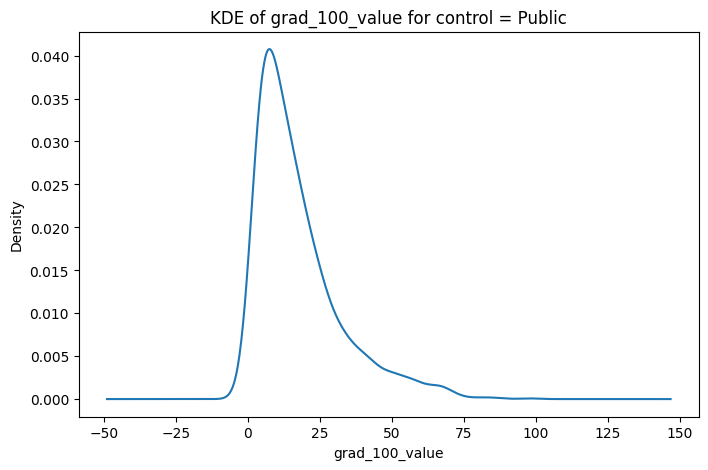


 Public
count    1499.000000
mean       17.430887
std        14.729443
min         0.000000
25%         6.900000
50%        13.200000
75%        23.250000
max        97.800000
Name: grad_100_value, dtype: float64


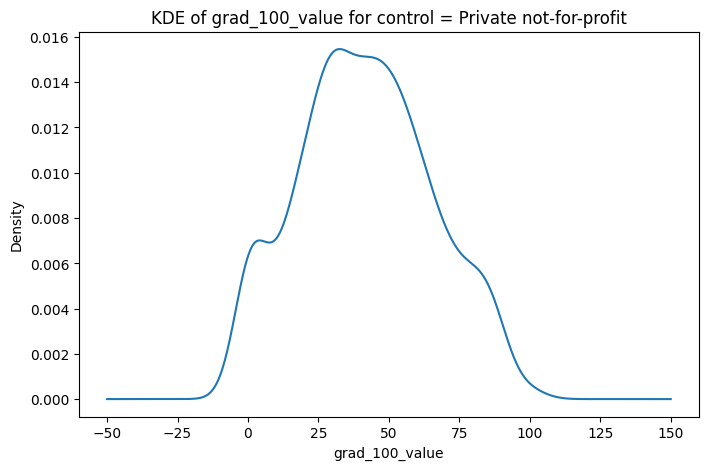


 Private not-for-profit
count    1189.000000
mean       41.660976
std        23.551231
min         0.000000
25%        25.000000
50%        41.000000
75%        58.300000
max       100.000000
Name: grad_100_value, dtype: float64


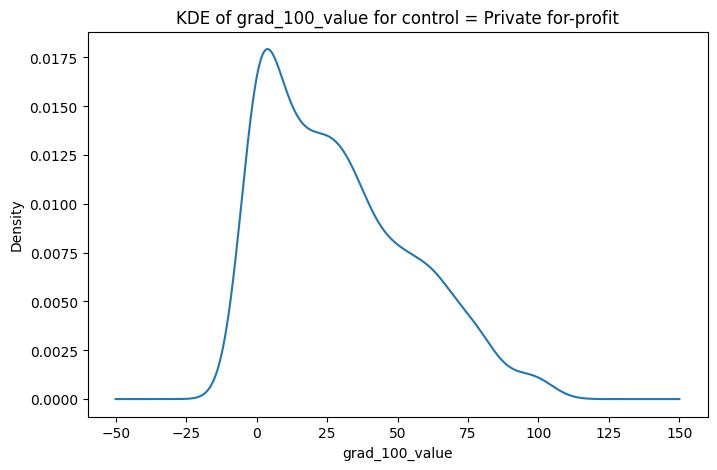


 Private for-profit
count    779.000000
mean      29.108858
std       25.601687
min        0.000000
25%        6.950000
50%       24.700000
75%       46.750000
max      100.000000
Name: grad_100_value, dtype: float64


In [87]:
for c in college["control"].dropna().unique():
    subset = college[college["control"] == c]["grad_100_value"].dropna()
    
    subset.plot(kind="kde", figsize=(8,5))
    plt.xlabel("grad_100_value")
    plt.title(f"KDE of grad_100_value for control = {c}")
    plt.show()
    
    print("\n", c)
    print(subset.describe())


4. Private not-for-profit has a higher graduation rate on average. 

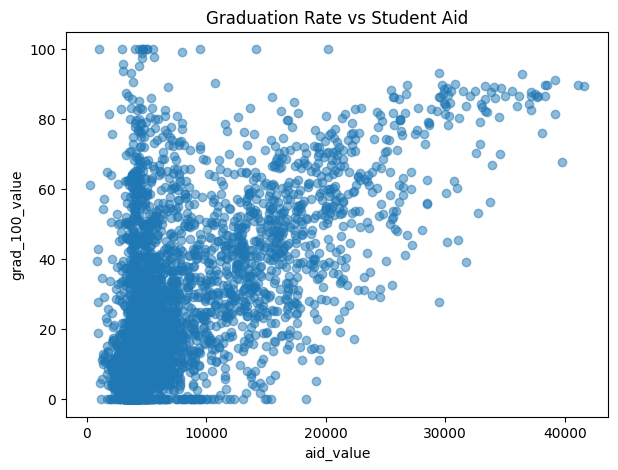

In [88]:
plt.figure(figsize=(7,5))
plt.scatter(college["aid_value"], college["grad_100_value"], alpha=0.5)
plt.xlabel("aid_value")
plt.ylabel("grad_100_value")
plt.title("Graduation Rate vs Student Aid")
plt.show()

In [89]:
sub = college[["aid_value", "grad_100_value"]].dropna()

cov = sub["aid_value"].cov(sub["grad_100_value"])
corr = sub["aid_value"].corr(sub["grad_100_value"])

cov, corr

(np.float64(88610.48316902434), np.float64(0.5758792845936075))

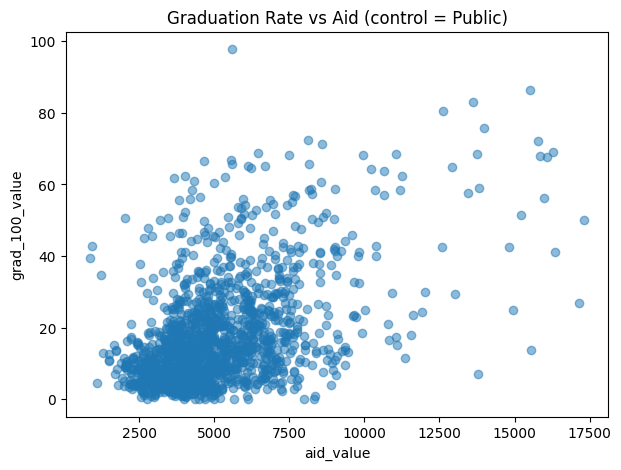


Control: Public
Covariance: 15355.146211760217
Correlation: 0.4824810458983383


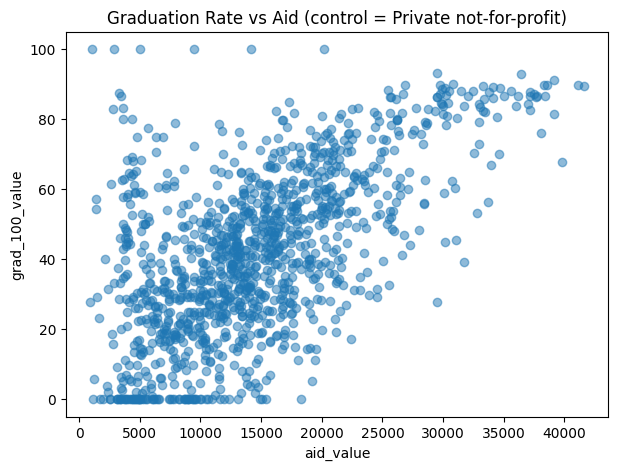


Control: Private not-for-profit
Covariance: 109274.12333702885
Correlation: 0.6015909241488575


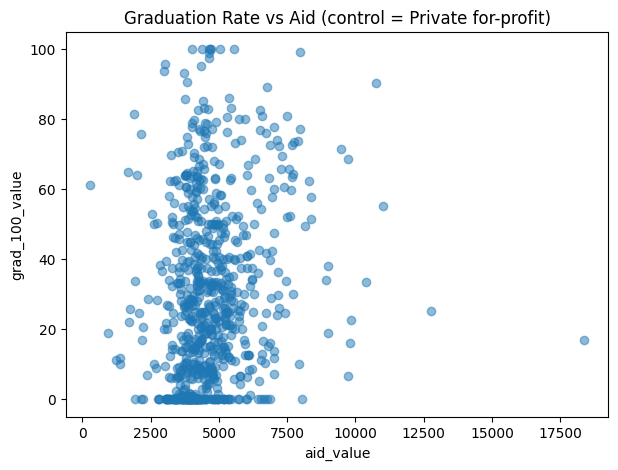


Control: Private for-profit
Covariance: 6897.5249572378125
Correlation: 0.18836270084245593


In [90]:
for c in college["control"].dropna().unique():
    sub_c = college[college["control"] == c][["aid_value", "grad_100_value"]].dropna()
    
    plt.figure(figsize=(7,5))
    plt.scatter(sub_c["aid_value"], sub_c["grad_100_value"], alpha=0.5)
    plt.xlabel("aid_value")
    plt.ylabel("grad_100_value")
    plt.title(f"Graduation Rate vs Aid (control = {c})")
    plt.show()
    
    cov_c = sub_c["aid_value"].cov(sub_c["grad_100_value"])
    corr_c = sub_c["aid_value"].corr(sub_c["grad_100_value"])
    
    print(f"\nControl: {c}")
    print("Covariance:", cov_c)
    print("Correlation:", corr_c)

5. Aid appears to vary most positively with graduation rates among private not-for-profit institutions, while the relationship is weaker and noisier for public and private for-profit institutions.

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

1. 
We compute the mean directly:
$$
m(a+bX) = \dfrac{1}{N}\sum_{i=1}^N (a + bx_i).
$$

Distribute the sum:
$$
m(a+bX) = \dfrac{1}{N}\left(\sum_{i=1}^N a + b\sum_{i=1}^N x_i\right).
$$

Simplify:
$$
m(a+bX) = \dfrac{1}{N}(Na) + b\left(\dfrac{1}{N}\sum_{i=1}^N x_i\right)
= a + b\,m(X).
$$

2. 
Using the definition of covariance:
$$
\text{cov}(X,X) = \dfrac{1}{N}\sum_{i=1}^N (x_i - m(X))(x_i - m(X)).
$$

So:
$$
\text{cov}(X,X) = \dfrac{1}{N}\sum_{i=1}^N (x_i - m(X))^2 = s^2.
$$


3. 
First note that:
$$
m(a+bY) = a + b\,m(Y).
$$

Now compute covariance:
$$
\text{cov}(X,a+bY) = \dfrac{1}{N}\sum_{i=1}^N (x_i-m(X))\Big((a+by_i)-m(a+bY)\Big).
$$

Substitute $m(a+bY)=a+b\,m(Y)$:
$$
\text{cov}(X,a+bY) = \dfrac{1}{N}\sum_{i=1}^N (x_i-m(X))\Big((a+by_i)-(a+b\,m(Y))\Big).
$$

Factor out $b$:
$$
\text{cov}(X,a+bY) = \dfrac{1}{N}\sum_{i=1}^N (x_i-m(X))\cdot b(y_i-m(Y)).
$$

So:
$$
\text{cov}(X,a+bY) = b\left(\dfrac{1}{N}\sum_{i=1}^N (x_i-m(X))(y_i-m(Y))\right)
= b\,\text{cov}(X,Y).
$$

4. 
First:
$$
m(a+bX)=a+b\,m(X)
\quad \text{and} \quad
m(a+bY)=a+b\,m(Y).
$$

Now:
$$
\text{cov}(a+bX,a+bY)
= \dfrac{1}{N}\sum_{i=1}^N \Big((a+bx_i)-(a+b\,m(X))\Big)\Big((a+by_i)-(a+b\,m(Y))\Big).
$$

Simplify the terms:
$$
\text{cov}(a+bX,a+bY)
= \dfrac{1}{N}\sum_{i=1}^N \Big(b(x_i-m(X))\Big)\Big(b(y_i-m(Y))\Big).
$$

So:
$$
\text{cov}(a+bX,a+bY)
= b^2\left(\dfrac{1}{N}\sum_{i=1}^N (x_i-m(X))(y_i-m(Y))\right)
= b^2\text{cov}(X,Y).
$$

In particular, if $Y=X$, then:
$$
\text{cov}(bX,bX)=b^2\text{cov}(X,X)=b^2s^2.
$$

5. 
Yes, for $b>0$ the transformation $a+bX$ preserves the ordering of the data, so:
$$
\text{med}(a+bX)=a+b\,\text{med}(X).
$$

For the IQR, adding $a$ shifts both quartiles by $a$ and multiplying by $b$ scales both quartiles by $b$, so:
$$
\text{IQR}(a+bX)=b\,\text{IQR}(X).
$$

So the median shifts and scales the same way, and the IQR scales by $b$ (not by $a+b$).

6. 
Let $X=\{0,4\}$. Then:
$$
m(X)=\dfrac{0+4}{2}=2.
$$

Now compare $m(X^2)$ and $(m(X))^2$:
$$
m(X^2)=\dfrac{0^2+4^2}{2}=\dfrac{16}{2}=8,
\quad
(m(X))^2=2^2=4.
$$

So $m(X^2)\neq (m(X))^2$.

Now compare $m(\sqrt{X})$ and $\sqrt{m(X)}$:
$$
m(\sqrt{X})=\dfrac{\sqrt{0}+\sqrt{4}}{2}=\dfrac{0+2}{2}=1,
\quad
\sqrt{m(X)}=\sqrt{2}\approx 1.414.
$$

So $m(\sqrt{X})\neq \sqrt{m(X)}$.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [91]:
college = pd.read_csv('/workspace/undergrad_ml/data/college_completion.csv')
college.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [92]:
ames = pd.read_csv('/workspace/undergrad_ml/data/ames_prices.csv')
ames.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [93]:
ames["price"] = pd.to_numeric(ames["price"], errors="coerce")

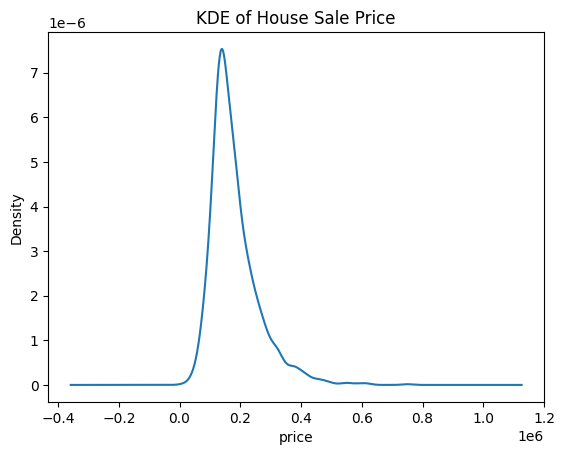

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64

In [ ]:
ames["price"].dropna().plot(kind="kde")
plt.xlabel("price")
plt.title("KDE of House Sale Price")
plt.show()

ames["price"].describe()

In [95]:
desc_by_type = ames.groupby("Bldg.Type")["price"].describe()
desc_by_type

,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,184812.041237,82821.802329,12789.0,130000.0,165000.0,220000.0,755000.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,192311.914163,66191.738021,71000.0,145000.0,180000.0,222000.0,392500.0


In [96]:
mean_by_type = ames.groupby("Bldg.Type")["price"].mean().sort_values(ascending=False)
var_by_type  = ames.groupby("Bldg.Type")["price"].var().sort_values(ascending=False)

mean_by_type, var_by_type

(Bldg.Type
 TwnhsE    192311.914163
 1Fam      184812.041237
 Duplex    139808.935780
 Twnhs     135934.059406
 2fmCon    125581.709677
 Name: price, dtype: float64,
 Bldg.Type
 1Fam      6.859451e+09
 TwnhsE    4.381346e+09
 Twnhs     1.758874e+09
 Duplex    1.560169e+09
 2fmCon    9.665408e+08
 Name: price, dtype: float64)

3

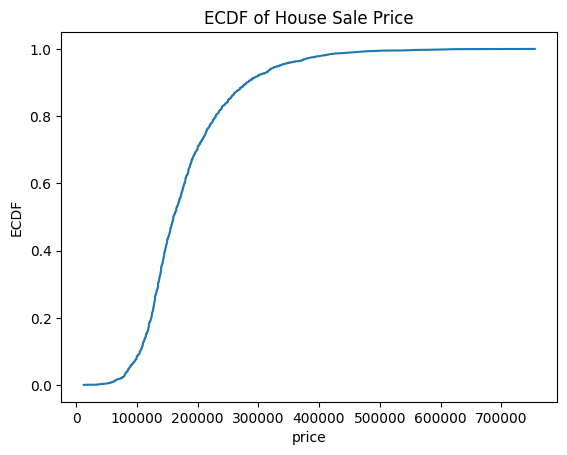

In [97]:
x = np.sort(ames["price"].dropna().to_numpy())
y = np.arange(1, len(x) + 1) / len(x)

plt.plot(x, y)
plt.xlabel("price")
plt.ylabel("ECDF")
plt.title("ECDF of House Sale Price")
plt.show()

In [98]:
five_num = ames["price"].quantile([0, 0.25, 0.5, 0.75, 1.0])
five_num

0.00     12789.0
0.25    129500.0
0.50    160000.0
0.75    213500.0
1.00    755000.0
Name: price, dtype: float64

4

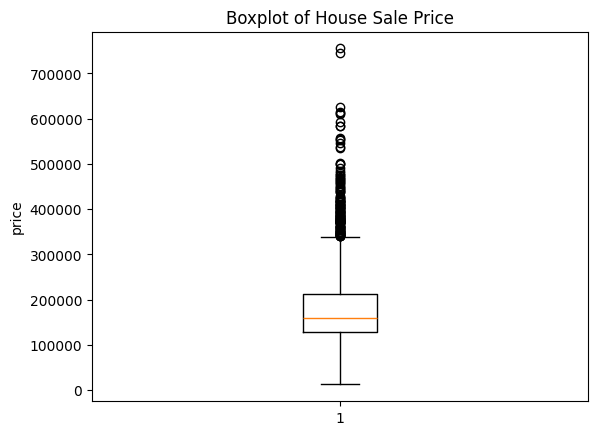

In [99]:
plt.boxplot(ames["price"].dropna(), vert=True)
plt.ylabel("price")
plt.title("Boxplot of House Sale Price")
plt.show()

5

In [101]:
q1 = ames["price"].quantile(0.25)
q3 = ames["price"].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

ames["price_outlier"] = ((ames["price"] < lower) | (ames["price"] > upper)).astype(int)

ames["price_outlier"].value_counts()


price_outlier
0    2793
1     137
Name: count, dtype: int64

6

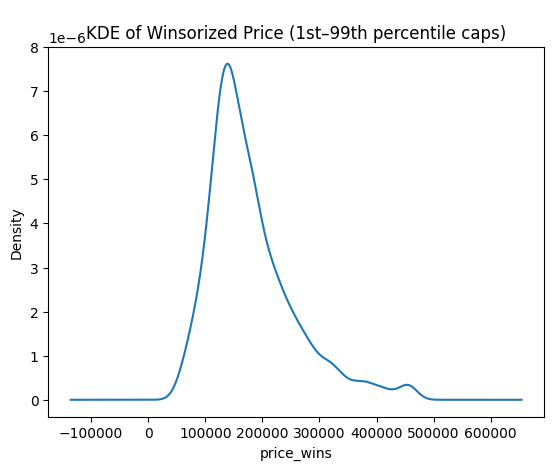

count      2930.000000
mean     180091.154334
std       75842.579174
min       61756.070000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      456666.370000
Name: price_wins, dtype: float64

In [102]:
p01 = ames["price"].quantile(0.01)
p99 = ames["price"].quantile(0.99)

ames["price_wins"] = ames["price"].clip(lower=p01, upper=p99)

ames["price_wins"].dropna().plot(kind="kde")
plt.xlabel("price_wins")
plt.title("KDE of Winsorized Price (1st–99th percentile caps)")
plt.show()

ames["price_wins"].describe()

In [103]:
pd.DataFrame({
    "original": ames["price"].describe(),
    "winsorized": ames["price_wins"].describe()
})

,original,winsorized
count,2930.000000,2930.000000
mean,180796.060068,180091.154334
std,79886.692357,75842.579174
min,12789.000000,61756.070000
25%,129500.000000,129500.000000
50%,160000.000000,160000.000000
75%,213500.000000,213500.000000
max,755000.000000,456666.370000


Winsorizing reduces the impact of extreme high-end outliers, so the std/variance decreases, the KDE tail becomes less extreme, and the mean may shift slightly.